In [2]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
FILE_PATH: Path = Path.cwd().parent / "data" / "Walmart_customer_purchases.csv"
# FILE_PATH: Path = Path.cwd().absolute() / "data" / "Walmart_customer_purchases.csv"

In [4]:
df = pd.read_csv(FILE_PATH, sep=",")

In [5]:
df.head()

,Customer_ID,Age,Gender,City,Category,Product_Name,Purchase_Date,Purchase_Amount,Payment_Method,Discount_Applied,Rating,Repeat_Customer
0,84607c1f-910c-44d5-b89f-e1ee06dd34c0,49,Female,New Cynthia,Electronics,Smartphone,2024-08-30,253.26,Cash on Delivery,No,1,Yes
1,f2a81712-a73e-4424-8b39-4c615a0bd4ea,36,Other,Cruzport,Clothing,T-Shirt,2024-12-21,73.19,Debit Card,Yes,1,No
2,da9be287-8b0e-4688-bccd-1a2cdd7567c6,52,Male,Jeffreytown,Beauty,Perfume,2024-12-26,125.62,Credit Card,Yes,1,No
3,50ec6932-3ac7-492f-9e55-4b148212f302,47,Female,Jenniferburgh,Electronics,Smartwatch,2024-11-04,450.32,Credit Card,No,2,Yes
4,8fdc3098-fc75-4b0f-983c-d8d8168c6362,43,Other,Kingshire,Electronics,Smartphone,2024-10-07,369.28,Credit Card,Yes,2,Yes


In [6]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Customer_ID       50000 non-null  object 
 1   Age               50000 non-null  int64  
 2   Gender            50000 non-null  object 
 3   City              50000 non-null  object 
 4   Category          50000 non-null  object 
 5   Product_Name      50000 non-null  object 
 6   Purchase_Date     50000 non-null  object 
 7   Purchase_Amount   50000 non-null  float64
 8   Payment_Method    50000 non-null  object 
 9   Discount_Applied  50000 non-null  object 
 10  Rating            50000 non-null  int64  
 11  Repeat_Customer   50000 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 4.6+ MB


,Age,Purchase_Amount,Rating
count,50000.000000,50000.000000,50000.000000
mean,38.945220,255.532230,2.998680
std,12.398137,141.574416,1.417956
min,18.000000,10.010000,1.000000
25%,28.000000,133.050000,2.000000
50%,39.000000,255.045000,3.000000
75%,50.000000,378.912500,4.000000
max,60.000000,499.990000,5.000000


In [7]:
df.isna().sum()

Customer_ID         0
Age                 0
Gender              0
City                0
Category            0
Product_Name        0
Purchase_Date       0
Purchase_Amount     0
Payment_Method      0
Discount_Applied    0
Rating              0
Repeat_Customer     0
dtype: int64

In [8]:
df.isnull().any()

Customer_ID         False
Age                 False
Gender              False
City                False
Category            False
Product_Name        False
Purchase_Date       False
Purchase_Amount     False
Payment_Method      False
Discount_Applied    False
Rating              False
Repeat_Customer     False
dtype: bool

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Rating'}>],
       [<Axes: title={'center': 'Purchase_Amount'}>, <Axes: >]],
      dtype=object)

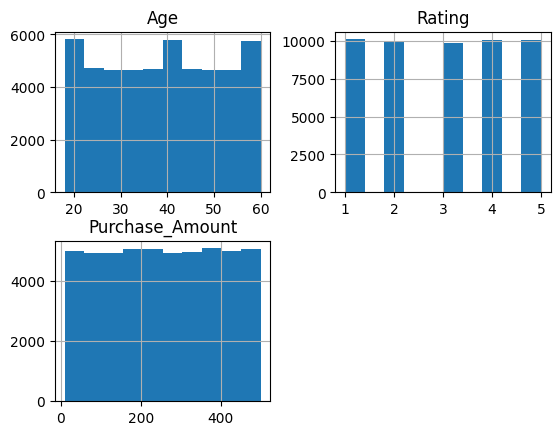

In [9]:
df[['Age', 'Rating', 'Purchase_Amount']].hist()

In [10]:
df.describe(include='object')

,Customer_ID,Gender,City,Category,Product_Name,Purchase_Date,Payment_Method,Discount_Applied,Repeat_Customer
count,50000,50000,50000,50000,50000,50000,50000,50000,50000
unique,50000,3,25096,4,16,366,4,2,2
top,84607c1f-910c-44d5-b89f-e1ee06dd34c0,Other,New Michael,Electronics,Headphones,2024-12-25,Debit Card,No,Yes
freq,1,16751,44,12642,3261,171,12589,25018,25244


In [11]:
df['Gender'].unique()

for item in ['Gender', 'Category', 'Product_Name', 'Payment_Method', 'Discount_Applied', "Repeat_Customer"]:
    print(df[item].unique())

['Female' 'Other' 'Male']
['Electronics' 'Clothing' 'Beauty' 'Home']
['Smartphone' 'T-Shirt' 'Perfume' 'Smartwatch' 'Laptop' 'Sofa Cover'
 'Shampoo' 'Cookware' 'Curtains' 'Jeans' 'Headphones' 'Jacket'
 'Face Cream' 'Lipstick' 'Lamp' 'Dress']
['Cash on Delivery' 'Debit Card' 'Credit Card' 'UPI']
['No' 'Yes']
['Yes' 'No']


In [12]:
df = df.copy()
df['id'] = df.index + 1
df['id']

0            1
1            2
2            3
3            4
4            5
         ...  
49995    49996
49996    49997
49997    49998
49998    49999
49999    50000
Name: id, Length: 50000, dtype: int64

In [13]:
df.set_index('id', inplace=True)

In [14]:
df['Purchase_Date'].head()

id
1    2024-08-30
2    2024-12-21
3    2024-12-26
4    2024-11-04
5    2024-10-07
Name: Purchase_Date, dtype: object

In [15]:
df['Purchase_Date'] = pd.to_datetime(df['Purchase_Date'])
df['Purchase_Date'].dtype

dtype('<M8[ns]')

In [16]:
df['Purchase_Date'].describe()
df['Purchase_Date'][df['Purchase_Date'].duplicated()].unique()


<DatetimeArray>
['2024-12-21 00:00:00', '2024-12-26 00:00:00', '2024-03-16 00:00:00',
 '2024-09-27 00:00:00', '2024-06-15 00:00:00', '2024-10-25 00:00:00',
 '2024-04-09 00:00:00', '2024-12-19 00:00:00', '2024-05-21 00:00:00',
 '2024-08-03 00:00:00',
 ...
 '2024-06-12 00:00:00', '2024-09-22 00:00:00', '2024-08-21 00:00:00',
 '2024-09-16 00:00:00', '2024-02-29 00:00:00', '2024-08-23 00:00:00',
 '2024-12-29 00:00:00', '2024-05-18 00:00:00', '2024-10-06 00:00:00',
 '2024-10-31 00:00:00']
Length: 366, dtype: datetime64[ns]

Now checking each individual item on my df to ensure that they have the right spread and dont have outliers or other odd data in it

<Axes: ylabel='Frequency'>

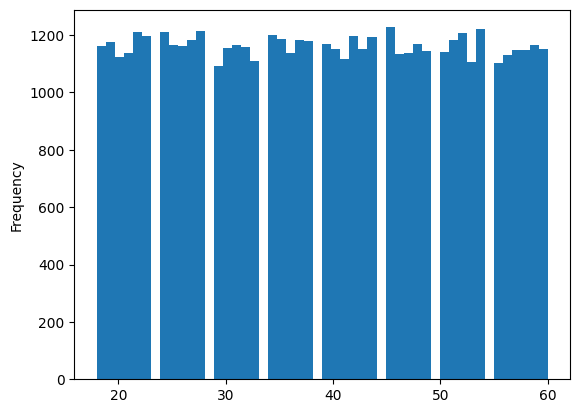

In [17]:
df['Age'].plot.hist(bins=50)

<Axes: xlabel='Age'>

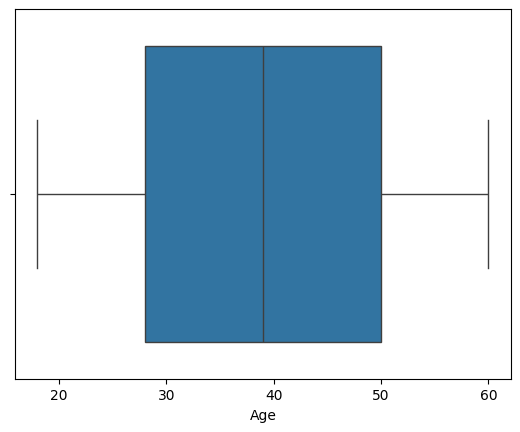

In [18]:
sns.boxplot(x=df['Age'])

<Axes: xlabel='Rating'>

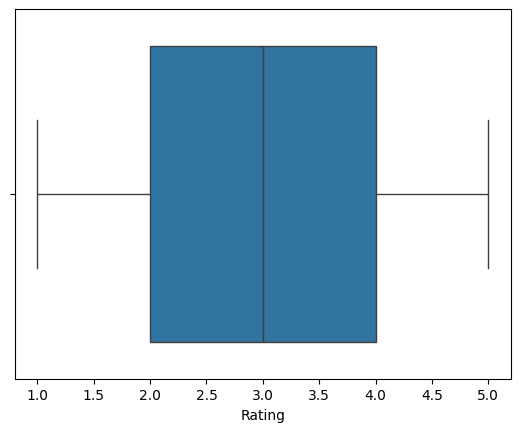

In [19]:
sns.boxplot(x=df['Rating'])

<Axes: xlabel='Purchase_Amount'>

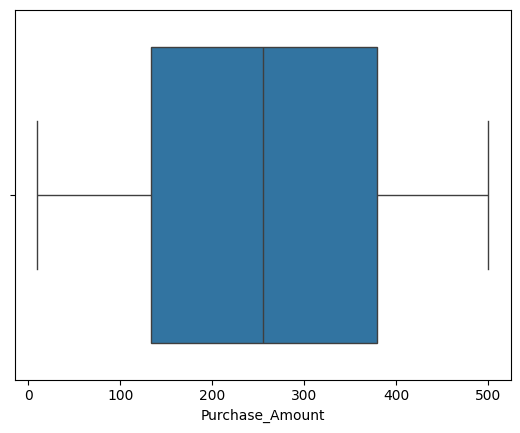

In [20]:
sns.boxplot(x=df['Purchase_Amount'])

In [21]:
df.columns

Index(['Customer_ID', 'Age', 'Gender', 'City', 'Category', 'Product_Name',
       'Purchase_Date', 'Purchase_Amount', 'Payment_Method',
       'Discount_Applied', 'Rating', 'Repeat_Customer'],
      dtype='object')

In [22]:
category_mapping = {
    "Electronics": 0,
    "Clothing": 1,
    "Beauty": 2,
    "Home": 3
}

df['Category'] = df['Category'].replace(category_mapping)
df['Category'].unique()

/tmp/ipykernel_906083/3200370401.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Category'] = df['Category'].replace(category_mapping)


array([0, 1, 2, 3])

In [23]:
gender_mapping = {
    "Female": 0,
    "Male": 1,
    "Other": 2
}

df['Gender'] = df['Gender'].replace(gender_mapping)
df['Gender'].unique()

/tmp/ipykernel_906083/2278414574.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'] = df['Gender'].replace(gender_mapping)


array([0, 2, 1])

In [24]:
payment_mapping = {
    "Cash on Delivery": 0,
    "Debit Card": 1,
    "Credit Card": 2,
    "UPI": 3
}
column = 'Payment_Method'
df[column] = df[column].replace(payment_mapping)
df[column].unique()

/tmp/ipykernel_906083/1211768212.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[column] = df[column].replace(payment_mapping)


array([0, 1, 2, 3])

In [25]:
discount_mapping = {
    "No": 0,
    "Yes": 1
}
column = 'Discount_Applied'
df[column] = df[column].replace(discount_mapping)
df[column].unique()

/tmp/ipykernel_906083/880665709.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[column] = df[column].replace(discount_mapping)


array([0, 1])

In [26]:
repeat_mapping = {
    "No": 0,
    "Yes": 1
}
column = 'Repeat_Customer'
df[column] = df[column].replace(repeat_mapping)
df[column].unique()

/tmp/ipykernel_906083/3668910646.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[column] = df[column].replace(repeat_mapping)


array([1, 0])

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, 1 to 50000
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Customer_ID       50000 non-null  object        
 1   Age               50000 non-null  int64         
 2   Gender            50000 non-null  int64         
 3   City              50000 non-null  object        
 4   Category          50000 non-null  int64         
 5   Product_Name      50000 non-null  object        
 6   Purchase_Date     50000 non-null  datetime64[ns]
 7   Purchase_Amount   50000 non-null  float64       
 8   Payment_Method    50000 non-null  int64         
 9   Discount_Applied  50000 non-null  int64         
 10  Rating            50000 non-null  int64         
 11  Repeat_Customer   50000 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(7), object(3)
memory usage: 5.0+ MB


#### Get the Shopper Demographics
Get what demographic shops the most products and categorize it by City

In [28]:
gender_pivot_by_age_with_amount= pd.pivot_table(df,
        index='Gender',
        columns=['Age'],
        values='Purchase_Amount',
        # aggfunc={'Age':'mean'}
)

<Axes: xlabel='Age'>

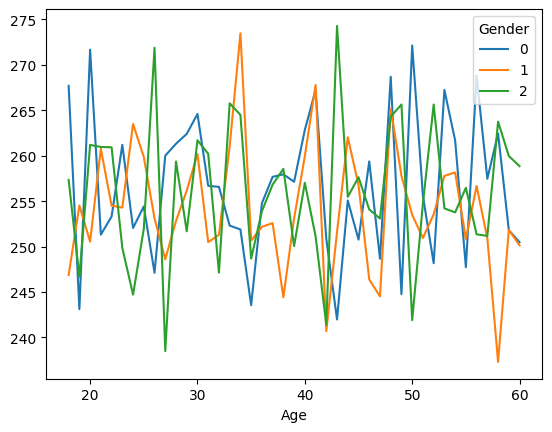

In [29]:
gender_pivot_by_age_with_amount.T.plot.line()
# Transposed it so that I can have only 3 genders vs Purchase Amount

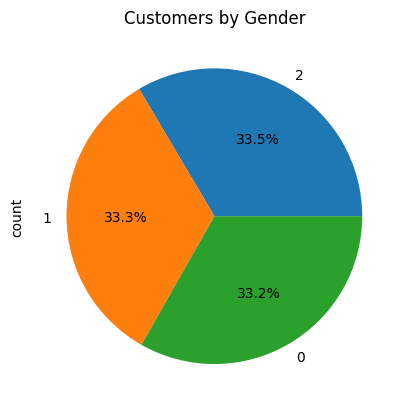

In [39]:
df['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Customers by Gender")
plt.show()

Show how many which age group used which payment method